In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("LoanDataset.csv",header=0)
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
data.shape

(614, 13)

<AxesSubplot: xlabel='Gender', ylabel='count'>

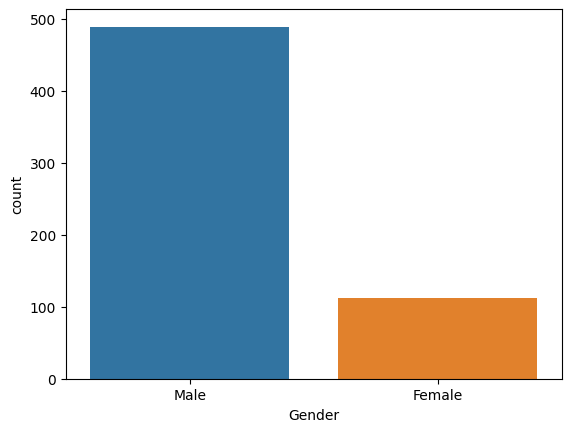

In [6]:
sns.countplot(x="Gender",data=data)

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

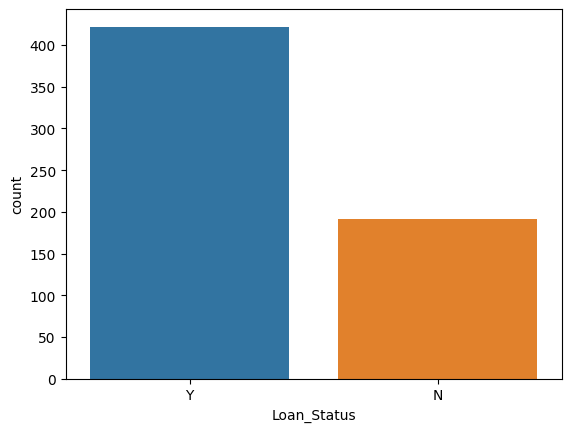

In [7]:
sns.countplot(x="Loan_Status",data=data)

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

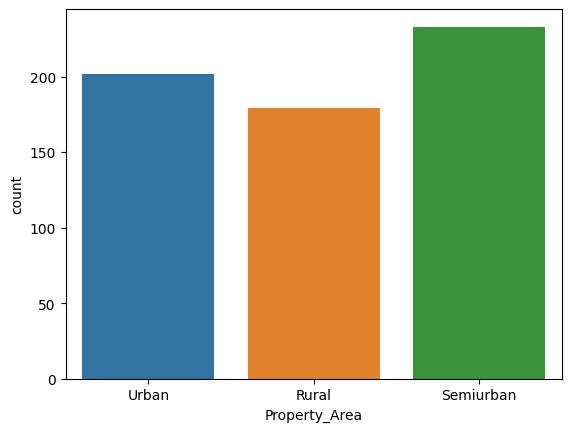

In [8]:
sns.countplot(x="Property_Area",data=data)

<AxesSubplot: xlabel='Dependents', ylabel='count'>

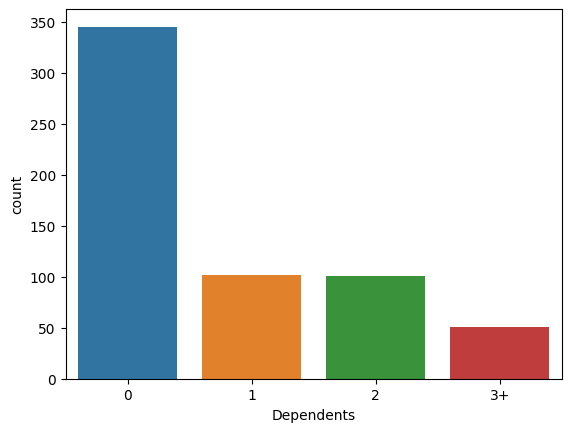

In [9]:
sns.countplot(x="Dependents",data=data)

<AxesSubplot: xlabel='Married', ylabel='count'>

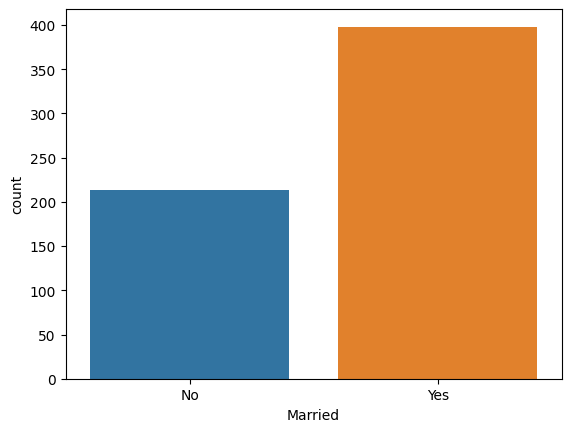

In [10]:
sns.countplot(x="Married",data=data)

<AxesSubplot: xlabel='Education', ylabel='count'>

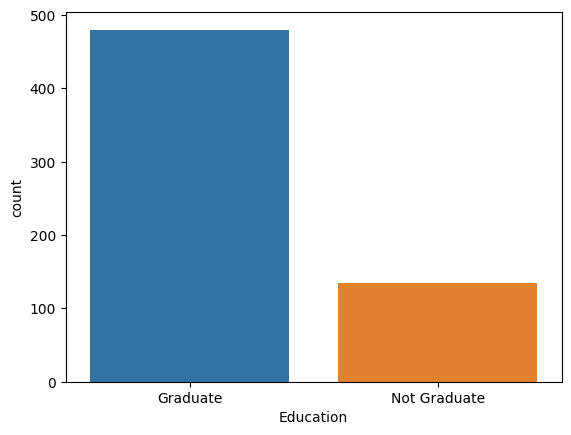

In [11]:
sns.countplot(x="Education",data=data)

<AxesSubplot: ylabel='ApplicantIncome'>

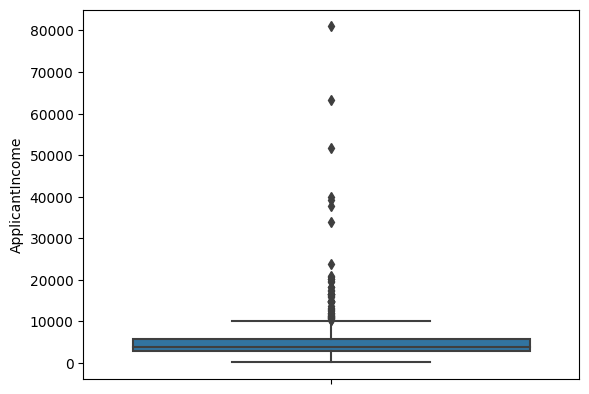

In [12]:
sns.boxplot(data,y="ApplicantIncome")

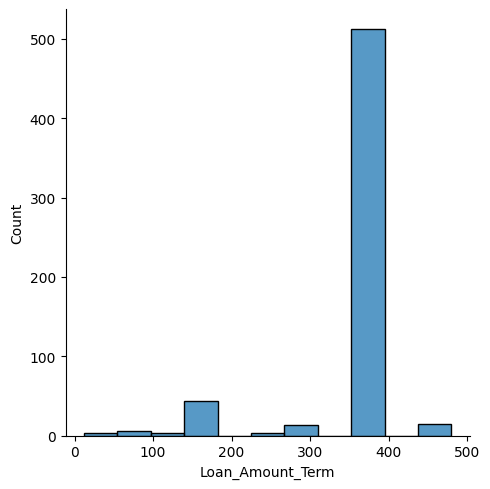

In [13]:
sns.displot(data['Loan_Amount_Term'])

In [113]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [114]:
#Replacing missing loan amount with mean
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

#Replacing all other missing values with mode
for i in data.columns:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [116]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [117]:
#Replace 3+ with 3 in Dependents
data['Dependents'] = data['Dependents'].replace('3+','3')

In [118]:
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [119]:
#OneHotEncoding
gender = pd.get_dummies(data['Gender'],prefix='Gender',drop_first=True)
education = pd.get_dummies(data['Education'],prefix='Education',drop_first=True)
married = pd.get_dummies(data['Married'],prefix='Married',drop_first=True)
area =  pd.get_dummies(data['Property_Area'],prefix='Area',drop_first=True)
self = pd.get_dummies(data['Self_Employed'],prefix='Self_Employed',drop_first=True)
status = pd.get_dummies(data['Loan_Status'],prefix='Loan_Status',drop_first=True)

data= pd.concat([data,gender,education,married,area,status,self],axis=1)
data = data.drop(['Gender','Education','Married','Property_Area','Loan_Status','Loan_ID','Self_Employed'],axis=1)

In [120]:
data['Loan_Status_Y'].value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

In [127]:
#SMOTE
y = data['Loan_Status_Y']

x = data.loc[:, data.columns != 'Loan_Status_Y']

sm = SMOTE(random_state = 2) 

x_res, y_res = sm.fit_resample(x, y.ravel())  

pd.Series(y_res).value_counts().plot(kind='bar', title='Class distribution after SMOTE', xlabel='Loan Status')


In [133]:
# Fit the model with CV
log_cv = LogisticRegressionCV(cv=10, random_state=0).fit(x_res, y_res)
log_cv.score(x_res, y_res)

C:\Users\inikh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7867298578199052

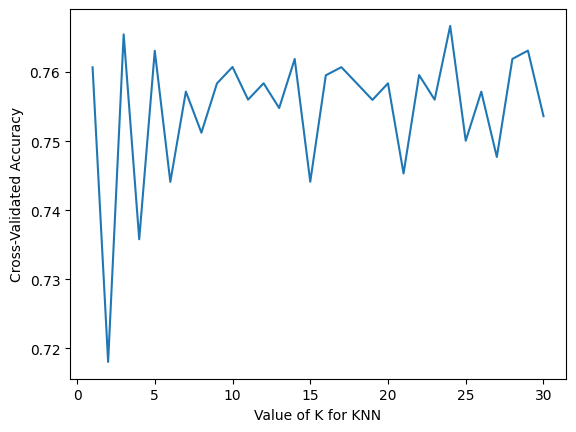

In [149]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_scaled, y_res, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
    
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [155]:
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 24)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, x_scaled, y_res, cv=5, scoring='accuracy')
scores.mean()

0.7666807551422935